In [53]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Загружаем данные

In [2]:
data = pd.read_csv("yeast.csv")
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


# Стандартизируем данные

In [3]:
X = data.drop(['name'], axis=1)
y = data['name']
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

# распределение данных представлено ниже

<AxesSubplot:xlabel='name', ylabel='count'>

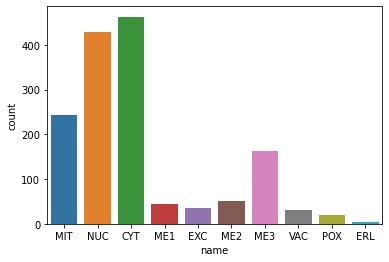

In [17]:
sns.countplot(x=data['name'])

In [35]:
data.groupby('name').count()
['CYT','ERL','EXC','ME1','ME2','ME3','MIT','NUC','POX','VAC']

,mcg,gvh,alm,mit,erl,pox,vac,nuc
name,,,,,,,,
CYT,463,463,463,463,463,463,463,463
ERL,5,5,5,5,5,5,5,5
EXC,35,35,35,35,35,35,35,35
ME1,44,44,44,44,44,44,44,44
ME2,51,51,51,51,51,51,51,51
ME3,163,163,163,163,163,163,163,163
MIT,244,244,244,244,244,244,244,244
NUC,429,429,429,429,429,429,429,429
POX,20,20,20,20,20,20,20,20


# Кластеризация методом Kmeans

In [5]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
kmeans.labels_

array([4, 4, 4, ..., 9, 0, 4])

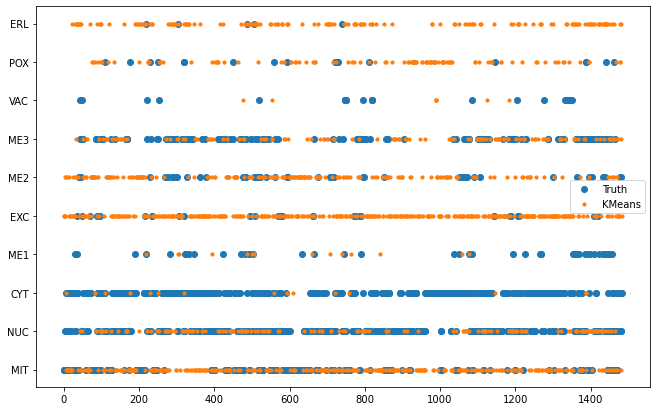

In [6]:
t = [i for i in X.index]
plt.figure(figsize=(11,7))
plt.scatter(t, y, label='Ground Truth')
plt.scatter(t, kmeans.labels_, s=10, label='KMeans')
plt.legend()

In [7]:
print("Homogeneity: %f" % metrics.homogeneity_score(y, kmeans.labels_))
print("Completeness: %f" % metrics.completeness_score(y, kmeans.labels_))
print("V-measure: %f" % metrics.v_measure_score(y, kmeans.labels_))
print("Adjusted Rand-Index: %f" % metrics.adjusted_rand_score(y, kmeans.labels_))
print("Silhouette: %f"  % metrics.silhouette_score(X, kmeans.labels_))

Homogeneity: 0.318696
Completeness: 0.282716
V-measure: 0.299629
Adjusted Rand-Index: 0.177343
Silhouette: 0.198030


# Качество кластеризации не плохое, совпадений достаточно много

# Кластеризация методом AgglomerativeClustering

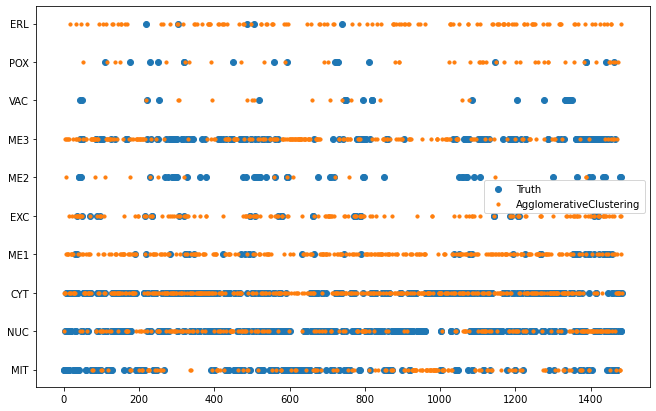

In [24]:
aglom = AgglomerativeClustering(n_clusters=10)
aglom.fit(X_scaled)
t = [i for i in X.index]
plt.figure(figsize=(11,7))
plt.scatter(t, y, label='Ground Truth')
plt.scatter(t, aglom.labels_, s=10, label='AgglomerativeClustering')
plt.legend()

In [23]:
print("Homogeneity: %f" % metrics.homogeneity_score(y, aglom.labels_))
print("Completeness: %f" % metrics.completeness_score(y, aglom.labels_))
print("V-measure: %f" % metrics.v_measure_score(y, aglom.labels_))
print("Adjusted Rand-Index: %f" % metrics.adjusted_rand_score(y, aglom.labels_))
print("Silhouette: %f"  % metrics.silhouette_score(X, aglom.labels_))

Homogeneity: 0.311850
Completeness: 0.264762
V-measure: 0.286383
Adjusted Rand-Index: 0.169237
Silhouette: 0.143312


# Визуально качество кластеризации так же неплохое, но метрики немного ниже метода Kmeans

# Класстеризация методом SpectralClustering

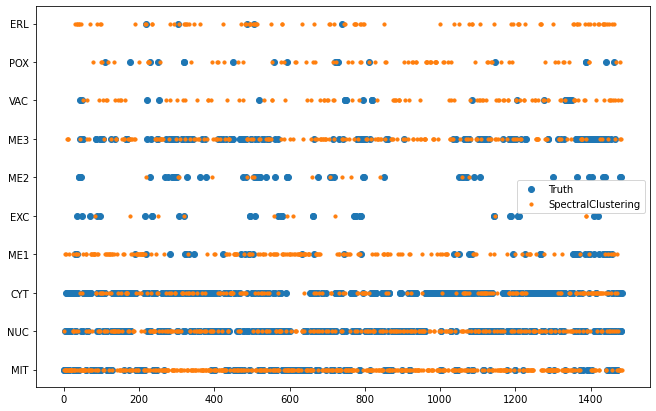

In [10]:
spectr = SpectralClustering(n_clusters=10)
spectr.fit(X_scaled)
spectr.fit_predict(X)
t = [i for i in X.index]
plt.figure(figsize=(11,7))
plt.scatter(t, y, label='Ground Truth')
plt.scatter(t, spectr.labels_, s=10, label='SpectralClustering')
plt.legend()

In [11]:
print("Homogeneity: %f" % metrics.homogeneity_score(y, spectr.labels_))
print("Completeness: %f" % metrics.completeness_score(y, spectr.labels_))
print("V-measure: %f" % metrics.v_measure_score(y, spectr.labels_))
print("Adjusted Rand-Index: %f" % metrics.adjusted_rand_score(y, spectr.labels_))
print("Silhouette: %f"  % metrics.silhouette_score(X, spectr.labels_))

Homogeneity: 0.304223
Completeness: 0.264927
V-measure: 0.283219
Adjusted Rand-Index: 0.152270
Silhouette: 0.174198


# Метрики кластеризации сравнимы с методом AgglomerativeClustering, но немного ниже, чем метрики Kmeans

# Кластеризация методом MeanShift

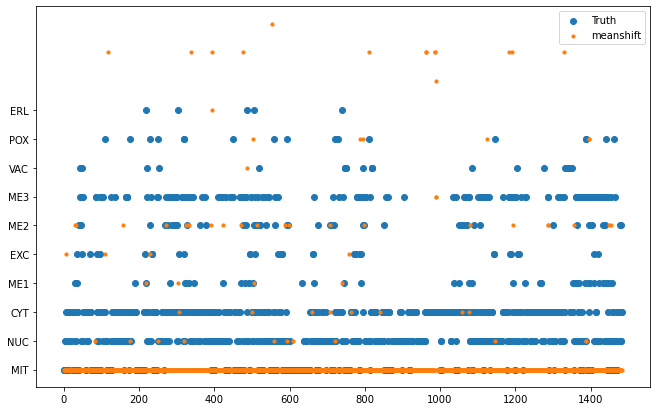

In [19]:
meanshift = MeanShift()
meanshift.fit(X_scaled)
t = [i for i in X.index]
plt.figure(figsize=(11,7))
plt.scatter(t, y, label='Ground Truth')
plt.scatter(t, meanshift.labels_, s=10, label='meanshift')
plt.legend()

In [20]:
print("Homogeneity: %f" % metrics.homogeneity_score(y, meanshift.labels_))
print("Completeness: %f" % metrics.completeness_score(y, meanshift.labels_))
print("V-measure: %f" % metrics.v_measure_score(y, meanshift.labels_))
print("Adjusted Rand-Index: %f" % metrics.adjusted_rand_score(y, meanshift.labels_))
print("Silhouette: %f"  % metrics.silhouette_score(X, meanshift.labels_))

Homogeneity: 0.049489
Completeness: 0.288002
V-measure: 0.084464
Adjusted Rand-Index: 0.018516
Silhouette: 0.122861


# Кластеризация сильно проигрывает визуально и аналитически другим методам

# Таким образом наиболее высокий результат кластеризации достигается методом Kmeans, методы AgglomerativeClustering и SpectralClustering показали схожие результаты кластеризации, но аналитически чуть менее точные, чем Kmeans. Метод MeanShift для классификации исходных данных является наименее удачным.

# Подберем оптимальные гиперпараметры

In [51]:
linkage = ['complete', 'average', 'single']
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

results1 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results2 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results3 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results4 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results5 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))

for i, link in enumerate(linkage):
    for j, aff in enumerate(affinity):
        agl_grid = AgglomerativeClustering(n_clusters=10, linkage=link, affinity=aff).fit(X_scaled)
        
        res1 = metrics.homogeneity_score(y, agl_grid.labels_)
        res2 = metrics.completeness_score(y, agl_grid.labels_) 
        res3 = metrics.v_measure_score(y, agl_grid.labels_)
        res4 = metrics.adjusted_rand_score(y, agl_grid.labels_)
        res5 = metrics.silhouette_score(X, agl_grid.labels_)
        results1[i, j] = res1
        results2[i, j] = res2
        results3[i, j] = res3
        results4[i, j] = res4
        results5[i, j] = res5

final_res1_ind = np.argmax(results1)
final_res2_ind = np.argmax(results2)
final_res3_ind = np.argmax(results3)
final_res4_ind = np.argmax(results4)
final_res5_ind = np.argmax(results5)
print(final_res1_ind, results1.flat[final_res1_ind])
print(final_res2_ind, results2.flat[final_res2_ind])
print(final_res3_ind, results3.flat[final_res3_ind])
print(final_res4_ind, results4.flat[final_res4_ind])
print(final_res5_ind, results5.flat[final_res5_ind])

9 0.2748584849942802
11 0.4041396947364916
9 0.24999228110018148
9 0.13675184447946254
11 0.2670655654656904


In [50]:
aglom = AgglomerativeClustering(n_clusters=10)
aglom.fit(X_scaled)
print("Homogeneity: %f" % metrics.homogeneity_score(y, aglom.labels_))
print("Completeness: %f" % metrics.completeness_score(y, aglom.labels_))
print("V-measure: %f" % metrics.v_measure_score(y, aglom.labels_))
print("Adjusted Rand-Index: %f" % metrics.adjusted_rand_score(y, aglom.labels_))
print("Silhouette: %f"  % metrics.silhouette_score(X, aglom.labels_))

Homogeneity: 0.311850
Completeness: 0.264762
V-measure: 0.286383
Adjusted Rand-Index: 0.169237
Silhouette: 0.143312


# Оптимизированные параметры повышают метрики не сильно, так что можно считать, что начальные параметры были заданы близки к оптимальным

# Визуализруем данные с помощью T-SNE

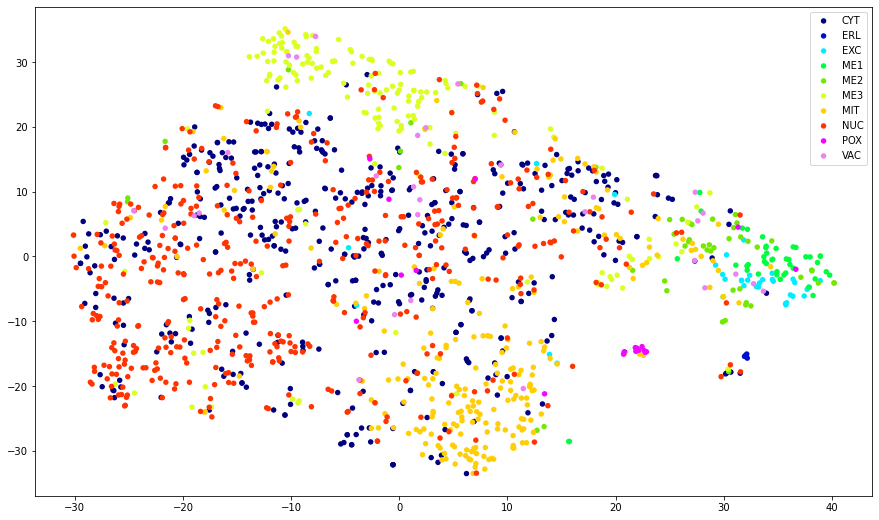

In [74]:
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize

tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(15, 9))
k = 0
for d in ['CYT','ERL','EXC','ME1','ME2','ME3','MIT','NUC','POX','VAC']:
    color = plt.cm.gist_ncar(norm(k))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=d, edgecolor='none', s=30)
    k += 1
plt.legend()

# Видно, что некоторые классы могут быть разделимы, но по большей части разделение произвести достаточно сложно

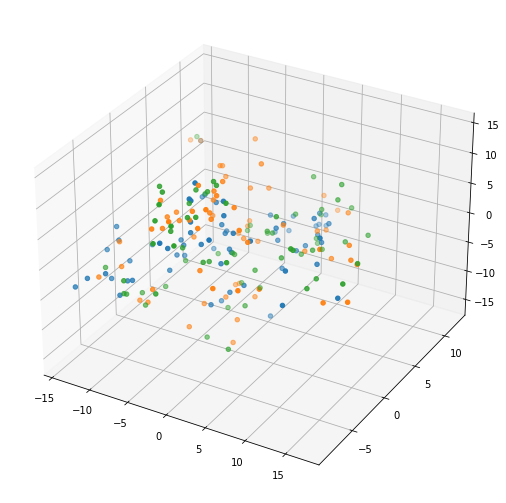

In [75]:
X_embedded3d = TSNE(n_components=3, init='random').fit_transform(X_scaled)
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_embedded3d[:70,0], X_embedded3d[:70,1], X_embedded3d[:70,2])
ax.scatter(X_embedded3d[71:140,0], X_embedded3d[71:140,1], X_embedded3d[71:140,2])
ax.scatter(X_embedded3d[141:210,0], X_embedded3d[141:210,1], X_embedded3d[141:210,2])

# На 3D модели также видно, что данные плохо разделимы

# Таким образом невысокие метрики разных методов кластеризации объясняются плохой разделимостью данных. Наиболее удачным для кластеризации методом оказался KMeans, а подбор оптимальных гиперпараметров для AgglomerativeClustering существенных повышений метрик не дал.